<a href="https://colab.research.google.com/github/FuturisticLover123/labs/blob/main/lab7/solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

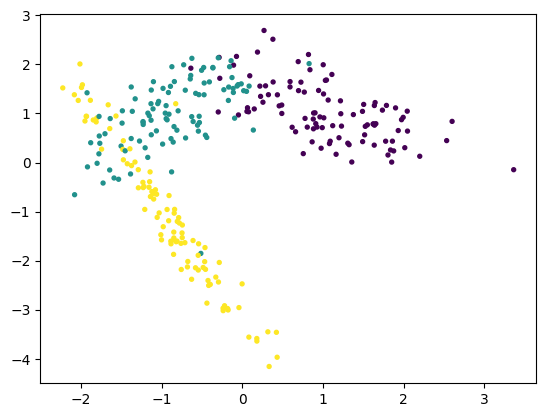

In [102]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from tqdm import tqdm
import numpy as np

X,y = make_classification(n_samples=300, n_features=2, n_informative=2,
                          n_redundant=0, n_classes=3, n_clusters_per_class=1, random_state=412)



plt.scatter(X[:,0], X[:,1],c=y,s=8)

In [103]:
#task 1

In [104]:
from sklearn.model_selection import validation_curve

def val_curve(X,y,param_range,model,param_name:str):
  train_scores, val_scores = validation_curve(
      model(),
      X, y,
      param_name=param_name,
      param_range=param_range,
      cv=5
  )

  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  val_mean = np.mean(val_scores, axis=1)
  val_std = np.std(val_scores, axis=1)

  plt.figure(figsize=(8, 6))
  plt.plot(param_range, train_mean, label="Training score", color="blue")
  plt.plot(param_range, val_mean, label="Validation score", color="red")

  plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
  plt.fill_between(param_range, val_mean - val_std, val_mean + val_std, color="red", alpha=0.2)

  plt.ylabel("Accuracy")
  plt.legend(loc="best")
  plt.show()


In [105]:
from collections import Counter
from sklearn.model_selection import train_test_split

class KNeibours:
  def __init__(self, distance="distance", k=3):
    self.distance = distance
    if distance == "distance":
      self.fdistance = lambda x,y: np.sqrt((x - y) @ (x - y))

    self.k = k

  def fit(self, X, y):
    self.X = X
    self.y = y

  def predict(self, X):
    return np.array([self.classify(x_i) for x_i in X])

  def classify(self, x):
    distances = [(self.fdistance(x_i, x), y_i) for x_i,y_i in zip(self.X, self.y)]

    sorted_dist = sorted(distances, key= lambda x: x[0])[1: self.k + 1]

    return Counter([x_i[1] for x_i in sorted_dist]).most_common(1)[0][0]

  def score(self, x, y):
    out = np.array([self.classify(x_i) for x_i in x])
    return np.sum(y - out == 0) / out.size

  def get_params(self, deep=True):
    return {"distance": self.distance, "k": self.k}

  def set_params(self, **params):
    for key, value in params.items():
        setattr(self, key, value)
    return self

In [106]:
from sklearn.model_selection import cross_val_score
kng = KNeibours()
cross_val_score(kng, X, y, cv=5).mean()

0.8966666666666667

In [107]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
cross_val_score(kng, X, y, cv=5).mean()

0.8966666666666667

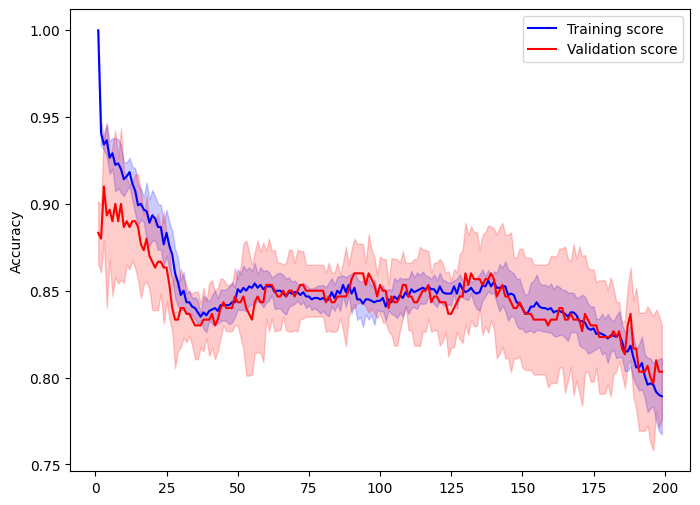

In [108]:
val_curve(X,y,range(1,200),KNeighborsClassifier,"n_neighbors")

In [109]:
#task 2

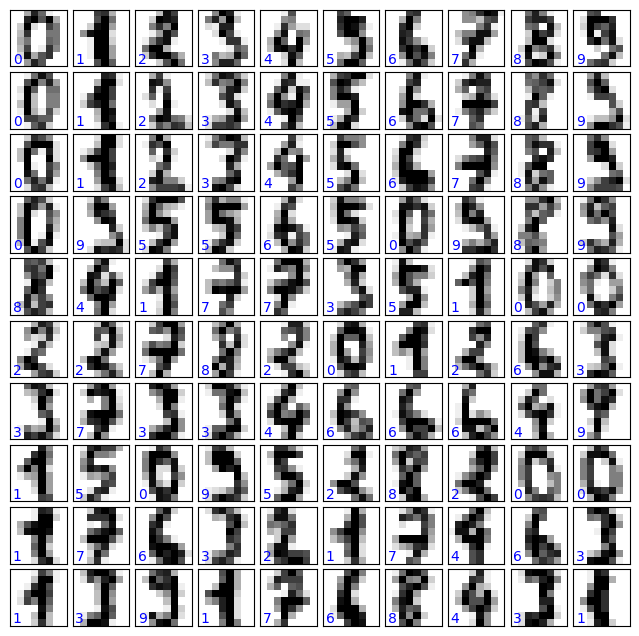

In [110]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))


for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='blue')

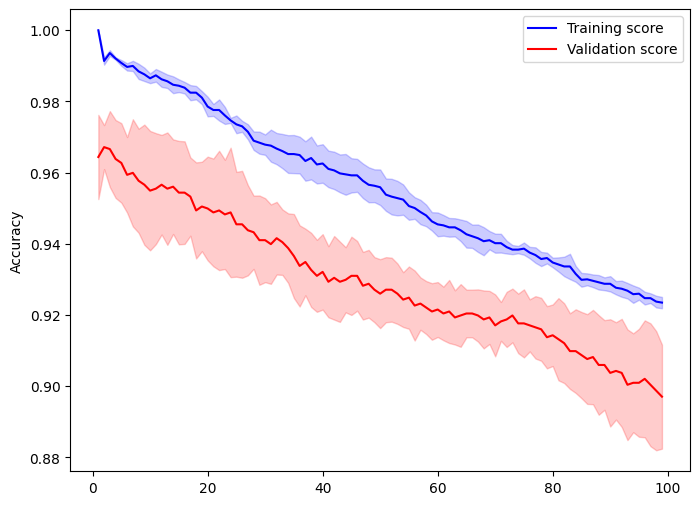

In [111]:
val_curve(digits.data,digits.target,range(1,100),KNeighborsClassifier,"n_neighbors")

In [112]:
from sklearn.model_selection import GridSearchCV
params = {"k": [3,4,5,7,10]}
model = KNeibours()

grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5,  n_jobs=-1)
grid_search.fit(digits.data,digits.target)
print(grid_search.best_score_)
print(grid_search.best_params_)


0.9604967502321262
{'k': 4}


In [113]:
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)
LogisticRegression().fit(x_train, y_train).score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9694444444444444

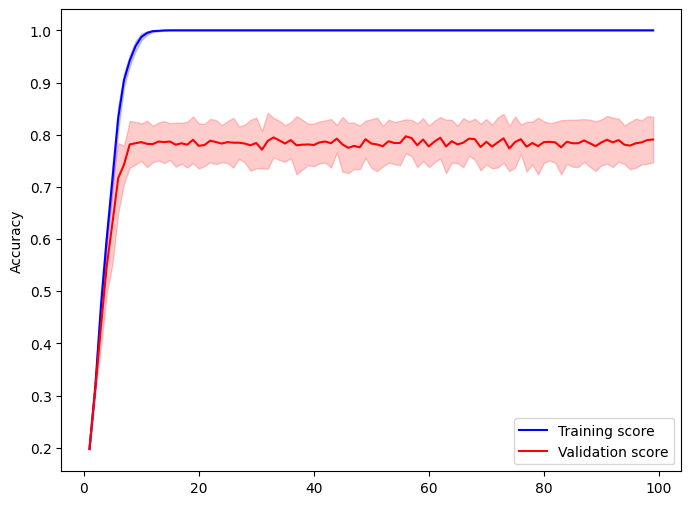

In [114]:
from sklearn.tree import DecisionTreeClassifier
val_curve(digits.data,digits.target,range(1,100),DecisionTreeClassifier,"max_depth")

In [116]:
from sklearn.tree import DecisionTreeClassifier
params = {"max_depth": [3,4,5,7,10, 12, 15, 17, 20]}
model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5,  n_jobs=-1)
grid_search.fit(digits.data,digits.target)
print(grid_search.best_score_)
print(grid_search.best_params_)


0.7891442277932529
{'max_depth': 10}


In [117]:
#task 3

In [118]:
import pandas as pd

In [119]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [51]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews -p /content/sample_data/lab7
!unzip /content/sample_data/lab7/imdb-dataset-of-50k-movie-reviews.zip -d /content/sample_data/lab7

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 89% 23.0M/25.7M [00:01<00:00, 26.2MB/s]
100% 25.7M/25.7M [00:01<00:00, 16.5MB/s]
Archive:  /content/sample_data/lab7/imdb-dataset-of-50k-movie-reviews.zip
  inflating: /content/sample_data/lab7/IMDB Dataset.csv  


In [120]:
data = pd.read_csv("/content/sample_data/lab7/IMDB Dataset.csv", encoding="UTF-8")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [121]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [122]:
def preprocess_text(text):
    text = text.lower()

    text = re.sub(r'[^\w\s]', '', text)

    words = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    return ' '.join(words)


text = "I running love programming in Python, and I enjoy solving coding challenges!"

processed_text = preprocess_text(text)
print(processed_text)


run love program python enjoy solv code challeng


In [123]:
data["review"] = data["review"].apply(preprocess_text)

In [124]:
data.to_csv("/content/sample_data/lab7/films.csv", index = False)

In [125]:
data = pd.read_csv("/content/sample_data/lab7/films.csv").dropna()

In [73]:
y = data['sentiment'].map({"positive" : 1, "negative": 0}).values
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data["review"].values)

In [77]:
# вроде норм но медленно пздц

from sklearn.tree import DecisionTreeClassifier
model = KNeighborsClassifier(n_neighbors=3)
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(x_train,y_train).score(x_test,y_test)



0.7771

In [78]:
#быстро модно молодежно
from sklearn.linear_model import LogisticRegression
LogisticRegression().fit(x_train,y_train).score(x_test,y_test)

0.8924

In [79]:
#другая векторизация

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["review"].values)


x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.627

In [80]:
#task 4

In [90]:
!kaggle competitions download -c titanic -p /content/sample_data/lab7
!unzip /content/sample_data/lab7/titanic.zip -d /content/sample_data/lab7

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/sample_data/lab7/titanic.zip
  inflating: /content/sample_data/lab7/gender_submission.csv  
  inflating: /content/sample_data/lab7/test.csv  
  inflating: /content/sample_data/lab7/train.csv  


In [94]:
df = pd.read_csv('/content/sample_data/lab7/train.csv').dropna()
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [95]:
df['Cabin'] = df['Cabin'].apply(lambda x: x[0])

In [96]:
fixed_data = pd.get_dummies(df.drop(columns=["Name","Ticket","Embarked"]),columns=['Sex',"Pclass", "Cabin"]).astype(float)
x = fixed_data.drop(columns = ['Survived']).values
y = fixed_data['Survived'].values

In [99]:
#так себе
from sklearn.model_selection import GridSearchCV
params = {"k": [3,4, 5, 7]}
model = KNeibours()

grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5,  n_jobs=-1)
grid_search.fit(x,y)
print(grid_search.best_score_)
print(grid_search.best_params_)


0.6728228228228228
{'k': 4}
